【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。
例えば、分類問題はKerasチュートリアルにあるCNN等でベースモデルラインを作成しても良いですし、これまでの課題で作成したモデルでも構いません。



In [1]:
import numpy as np

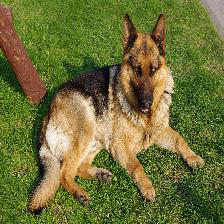

In [2]:
from PIL import Image
#path = 'data/dog-cat/dog/1.jpg'
path = '/content/drive/MyDrive/DIC/training/dog/10.jpg'  #cat-1246659__480.jpg
#path = 'dog-cat/dog/*.jpg'
img = Image.open(path)
img

In [3]:
from PIL import Image
import os, glob
import numpy as np
from PIL import ImageFile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [4]:
train_dir = "/content/drive/My Drive/DIC/training"
validation_dir = "/content/drive/My Drive/DIC/val"

In [5]:
train_cats_dir = os.path.join(train_dir, 'cat')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dog')  # 学習用の犬画像のディレクトリ
validation_cats_dir = os.path.join(validation_dir, 'cat')  # 検証用の猫画像のディレクトリ
validation_dogs_dir = os.path.join(validation_dir, 'dog')  # 検証用の犬画像のディレクトリ
# test_dir = "/content/drive/My Drive/DIC/My_Dataset/dataset/test"  # test用の画像のディレクトリ

In [6]:
batch_size = 5
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [7]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ
validation_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ
test_image_generator = ImageDataGenerator(rescale=1./255) # 検証データのジェネレータ

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 21 images belonging to 2 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 20 images belonging to 2 classes.


In [13]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
4/4 [==============================] - 4s 709ms/step - loss: 15.1978 - accuracy: 0.0625 - val_loss: 1.4997 - val_accuracy: 0.5000
Epoch 2/10
4/4 [==============================] - 3s 681ms/step - loss: 2.8450 - accuracy: 0.0000e+00 - val_loss: 0.7775 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 3s 650ms/step - loss: 0.9118 - accuracy: 0.1875 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 3s 796ms/step - loss: 0.5674 - accuracy: 0.6875 - val_loss: 0.8306 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 3s 807ms/step - loss: 0.8718 - accuracy: 0.5000 - val_loss: 0.6787 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 3s 632ms/step - loss: 0.7639 - accuracy: 0.3750 - val_loss: 0.6125 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 3s 809ms/step - loss: 0.6960 - accuracy: 0.5000 - val_loss: 0.5924 - val_accuracy: 0.5000
Epoch 8/10
4/4 

In [14]:
#１０枚づつしかデータないので、ACCが１になったので、過学習の可能性がありそうである

【問題2】分類データセットに対するデータ拡張
集めた画像をデータ拡張（Data Augmentation）してください。
画像を反転させたり、色を変えたり、クロッピング（一部だけ切り出す）などをしましょう。
また、下記にデータ拡張のためのライブラリがありますので、参考になりましたら幸いです。


《データ拡張のためのライブラリ》


データ拡張にはalbumentationsなどがあります。


albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries


また、Kerasを使う場合はImageDataGeneratorも便利です。


《データ拡張の効果の調査》


データ拡張にはさまざまな方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。


データを水増しされる際は、こちらの水増しテクニックについての参考論文（嬉しい日本語）などご参照ください。

+ このnotebookと同階層に、sprint18_imagesフォルダを作成
+ sprint18_imagesフォルダの中に、dogフォルダを作り、その中に、dog1.jpg～dog5.jpgの犬画像を配置
+ sprint18_imagesフォルダの中に、catフォルダを作り、その中に、cat1.jpg～cat5.jpgの猫画像を配置

sprint18_imagesディレクトリの中身

          dog
              dog1.jpg
              dog2.jpg
              ・・・・
          cat
              cat1.jpg
              cat2.jpg
              ・・・

In [15]:
#!pip install albumentations

In [16]:
# URLライブラリ
import urllib
import urllib.request
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [25]:
%pwd
# %ls
%cd drive/MyDrive/DIC/

/content/drive/MyDrive/DIC


In [26]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [27]:
def download_image():
    # data = urlopen(url).read()
    #data=cv2.imread('sample.jpg')
    image=cv2.imread('sample.jpg')
    print(image.shape)
    # data = np.frombuffer(data, np.uint8)
    # image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [28]:
image = download_image()

(388, 500, 3)


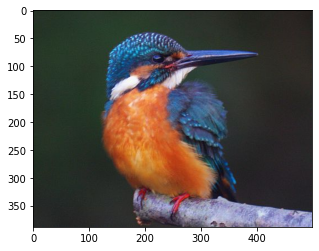

In [29]:
#＜元画像＞
plt.figure(figsize=(5, 5))
plt.imshow(image)
plt.show()

In [30]:
#＜左右反転＞
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(5, 5))
    plt.imshow(image)



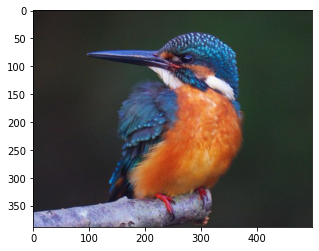

In [31]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)

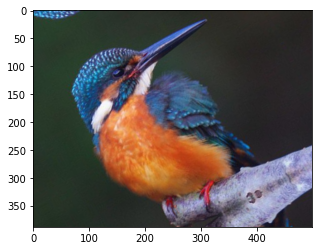

In [32]:
#＜回転＞
aug = ShiftScaleRotate(p=1)
augment_and_show(aug, image)

In [33]:
#＜回転と反転のMix＞
def augment_flips_color(p=.5):
    return Compose([
        CLAHE(),
        RandomRotate90(),
        Transpose(),
        ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
        Blur(blur_limit=3),
        OpticalDistortion(),
        GridDistortion(),
        HueSaturationValue()
    ], p=p)

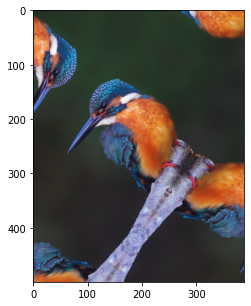

In [34]:
aug = augment_flips_color(p=1)
augment_and_show(aug, image)


In [35]:
# 画像のランダムな回転
# 回転のデータ拡張を利用して学習用サンプルをランダムに左右45度の範囲で回転させてみましょう。

In [36]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [37]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]


Found 21 images belonging to 2 classes.


In [38]:

# この関数は、1行5列のグリッド形式で画像をプロットし、画像は各列に配置されます。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

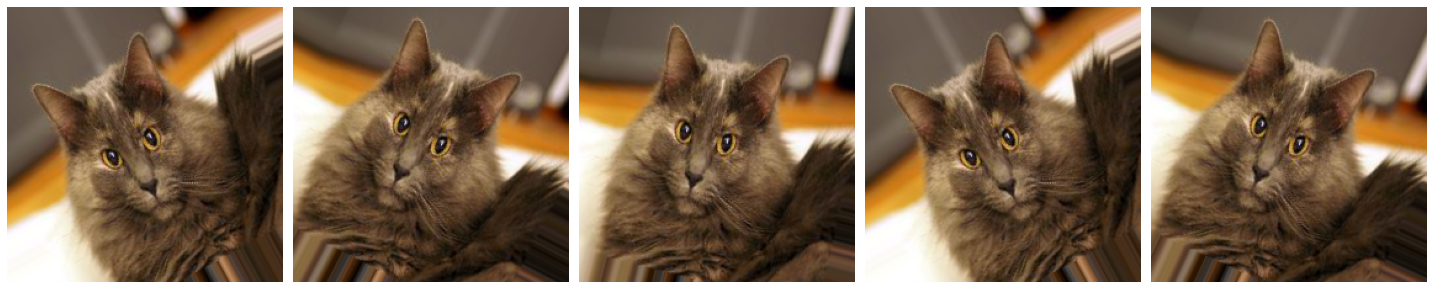

In [39]:
plotImages(augmented_images)


【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。


《アノテーションのためのツール》


アノテーションツールにはLabelImgなどがあります。


tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images

In [40]:
# 基本的なグローバル変数を定義
BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

In [41]:
## BBoxを描画する関数の定義
def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    """BBox描画
    Parameters
    -------------
    img : 画像
    bbox : BBox座標
    class_id : クラスラベル
    class_idx_to_name : クラスラベルの名前
    color=BOX_COLOR : BBoxの線色
    thickness : BBoxの線太さ
    """
    x_min, y_min, x_max,  y_max = bbox
    x_min, y_min, x_max,  y_max = int(x_min), int(y_min), int(x_max),  int(y_max)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.3, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.3,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    """複数のBBoxにも対応できる関数
    Parameters
    ----------------
    annotations : 画像とBBoxの情報
    category_id_to_name : クラスラベルとクラスラベルの名前
    """
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

In [42]:
import glob
import re
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras import optimizers
from tensorflow import keras
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image
import numpy as np
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
%matplotlib inline
import glob
import numpy as np
# 画像パス
# image_path_list = glob.glob(r'sprint18_images\cat\*')+glob.glob(r'sprint18_images\dog\*')
image_path_list = glob.glob('./sprint18_images/cat/*')+glob.glob('./sprint18_images/dog/*')
print(image_path_list)
# 説明変数と目的変数格納用変数
X = []
y = []

# 画像パスでループ
for image_path in image_path_list:
    # 正解ラベルを格納
    if image_path.find('dog')!=-1:
        y.append([0])
    else:
        y.append([1])
    # 画像データを格納
    image = load_img(image_path, grayscale=False, color_mode='rgb', target_size=(IMG_HEIGHT,IMG_WIDTH))
    image_array = img_to_array(image) / 255
    X.append(image_array)

# numpy配列化
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

['./sprint18_images/cat/dog1.jpg', './sprint18_images/cat/dog2.jpg', './sprint18_images/cat/dog3.jpg', './sprint18_images/cat/dog5.jpg', './sprint18_images/cat/dog4.jpg', './sprint18_images/dog/dog1.jpg', './sprint18_images/dog/dog2.jpg', './sprint18_images/dog/dog3.jpg', './sprint18_images/dog/dog4.jpg', './sprint18_images/dog/dog5.jpg']
(10, 224, 224, 3)
(10, 1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


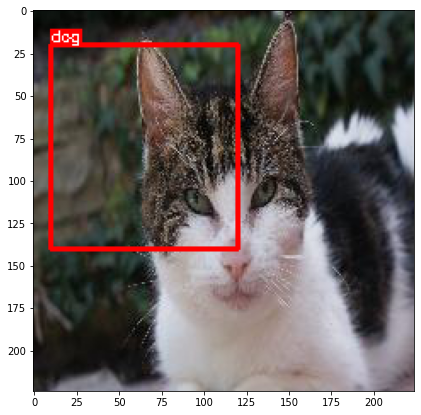

In [43]:
annotations = {'image': X[0], 'bboxes': [[10,20,120,140]], 'category_id': y[0]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


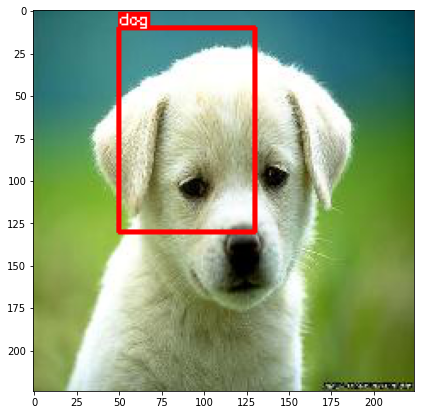

In [44]:
annotations = {'image': X[5], 'bboxes': [[50,10,130,130]], 'category_id': y[5]}
img = visualize(annotations,{0: 'dog', 1: 'cat'})

【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。


物体検出の学習を行なうかどうかは任意とします。


xmlファイルを扱うライブラリがありますので下記をご確認ください。
xml.etree.ElementTree

In [45]:
# ライブラリの読み込み
import albumentations as A

In [46]:
!pip install -U albumentations

In [47]:
# albumentations用にピクセル数を画像に対する割合に変更
annotations = {'image': X[5], 'bboxes': [[50/IMG_WIDTH,10/IMG_HEIGHT,130/IMG_WIDTH,130/IMG_HEIGHT]], 'category_id': y[5]}

In [48]:
# データ拡張
aug = A.Compose([
    A.RandomCrop(width=100, height=100),
    A.RandomBrightnessContrast(p=0.2),
], bbox_params=A.BboxParams(format='albumentations',label_fields=['category_id']))
augmented = aug(**annotations)